<a href="https://colab.research.google.com/github/mlukan/GDA3B2021/blob/main/Linear_regression_2_Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

# Multivariate linear regression with Scikit-Learn

The equation of an univariate linear regresion is a line : aX +b

The equation of a multivariate linear regression with 2 variables is a plan : aW + bX + c

The equation of a multivariate linear regression with n variables is a hyperplan : a1 X1 + a2 X2 + .... + an Xn + b


## Let's start with 2 variables
With Plotly express, show a [3D scatterplot ](https://plotly.com/python/plotly-express/#3d-coordinates)with :
- X-axis : MAX temperature
- Y-axis : MIN temperature
- Z-axis : Sunhours


In [9]:
# Your code here :
fig = px.scatter_3d(df_weather, x='MAX_TEMPERATURE_C',y='MIN_TEMPERATURE_C',z='SUNHOUR')
fig.update_traces(marker=dict(size=2))
fig.show()

Is it hard to read the 3D scatterplot ?

### Let's predict
You have to predict the MAX temperature from 2 variables :
- MIN temperature
- Sunhours

Hey, it's the reason why X has 2 brackets and is uppercase and y has a simple bracket and is lowercase . It can take multiple variables (X) to predict only one target (y). 

**Remember to save the result of your prediction in a cew column 'predict'.**

In [18]:
# Your code here :
from sklearn.linear_model import LinearRegression
X = df_weather[['MIN_TEMPERATURE_C','SUNHOUR']]
y = df_weather['MAX_TEMPERATURE_C']
model = LinearRegression().fit(X, y)
df_weather['predict']=model.predict(X)

### Let's visualize
With Plotly express, show a 3D scatterplot with :

- X-axis : your new 'predict' column
- Y-axis : MIN temperature
- Z-axis : Sunhours



In [19]:
# Your code here :
fig = px.scatter_3d(df_weather, x='predict',y='MIN_TEMPERATURE_C',z='SUNHOUR')
fig.update_traces(marker=dict(size=2))
fig.show()

**Move the cube with your mouse. Hey your 3D-scatterplot has a special shape : it's a plan !**

## Multivariate linear regressions with N-variables
Make a prediction with the maximum number of variables. But beware : 
- variables must be numeric
- your target (MAX temperature) should not be present in variables

Store your prediction in a new column 'predict2'.

In our 3D human vision, we can't represent a hyperplan. But, let's trust in our computer, it can calculate. So trust it and show a simple scatterplot with :
- X-axis : Date
- Y-axis : MAX temperatures in blue dots and 'predict2' in orange dots

Expected result:

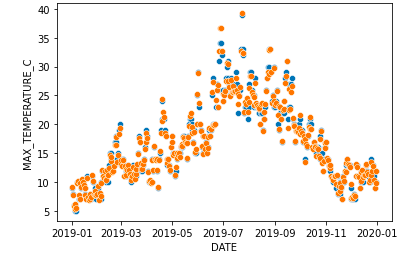

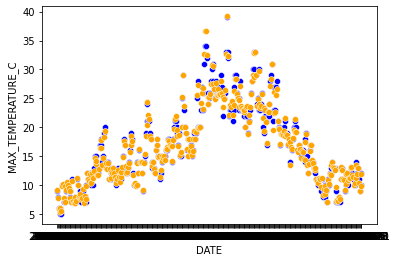

In [53]:
# Your code here :
X2=df_weather.select_dtypes(exclude='object')
X2=X2.drop(columns=['MAX_TEMPERATURE_C','predict','predict2'])
#X2=df_weather[['WINDSPEED_MAX_KMH','MIN_TEMPERATURE_C','PRECIP_TOTAL_DAY_MM','PRESSURE_MAX_MB']]
y2=df_weather['MAX_TEMPERATURE_C']
model2 = LinearRegression().fit(X2, y2)
df_weather['predict2']=model2.predict(X2)

sns.scatterplot(x=df_weather['DATE'], y=df_weather['MAX_TEMPERATURE_C'],color='b')
sns.scatterplot(x=df_weather['DATE'],y=df_weather['predict2'],color='orange')


You can read coefficient for each column with the attribute `.coef_`. Which column has the biggest coefficient ?

In [54]:
# Your code here
for i, j in zip (X2.columns, model2.coef_):
  print(i,j)


MIN_TEMPERATURE_C 0.06144011191801975
WINDSPEED_MAX_KMH -0.002823928363796635
TEMPERATURE_MORNING_C -0.0877957991658932
TEMPERATURE_NOON_C 0.19104164711089822
TEMPERATURE_EVENING_C 0.17694033106464735
PRECIP_TOTAL_DAY_MM 0.005048342612074217
HUMIDITY_MAX_PERCENT -0.00252888717783219
VISIBILITY_AVG_KM 0.010042909338621073
PRESSURE_MAX_MB -0.000583380423385512
CLOUDCOVER_AVG_PERCENT -0.005793786341191133
HEATINDEX_MAX_C 0.5842807479084101
DEWPOINT_MAX_C -0.0341808911419421
WINDTEMP_MAX_C 0.05221594780580949
WEATHER_CODE_MORNING 0.0005299146586756343
WEATHER_CODE_NOON 9.32567399880626e-05
WEATHER_CODE_EVENING -0.00021177678205345048
TOTAL_SNOW_MM 5.551115123125783e-17
UV_INDEX -0.02829646663345562
SUNHOUR -0.017294378744946257
MONTH 0.010717391001479976
DAY -0.001330923541613939
